In [45]:
!pip install torchvision

In [0]:
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as data
from torch.autograd import Variable

In [0]:
train_dataset=data.MNIST(root='./data',train=True,transform=transforms.ToTensor(),download=True)

In [48]:
len(train_dataset)

60000

In [49]:
type(train_dataset)

torchvision.datasets.mnist.MNIST

In [50]:
type(train_dataset[0])

tuple

In [51]:
type(train_dataset[0][0])

torch.Tensor

In [52]:
type(train_dataset[0][0].size)

builtin_function_or_method

In [53]:
type(train_dataset[0][0].size())

torch.Size

In [54]:
(train_dataset[0][0].size())

torch.Size([1, 28, 28])

In [55]:
(train_dataset[0][1])

tensor(5)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [58]:
train_dataset[0][0].numpy().shape

(1, 28, 28)

In [0]:
show_img=train_dataset[0][0].numpy().reshape(28,28)

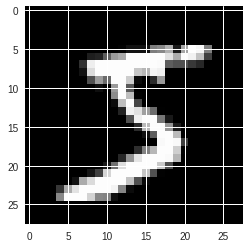

In [60]:
plt.imshow(show_img,cmap='gray')

In [0]:
test_dataset=data.MNIST(root='./data',train=False,transform=transforms.ToTensor())

In [62]:
len(train_dataset)

60000

In [0]:
batch_size=100

In [0]:
n_iters = 10000 

In [0]:
num_epochs=n_iters/(len(train_dataset)/batch_size)

In [66]:
type(num_epochs)

float

In [0]:
num_epochs=int(num_epochs)

In [68]:
num_epochs

16

In [0]:
train_loader=torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)

In [0]:
import collections

In [71]:
isinstance(train_loader,collections.Iterable)

True

In [0]:
test_loader=torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=False)

In [0]:
class LogRegression(nn.Module):
  def __init__(self,input_size,output_size):
    super(LogRegression,self).__init__()
    self.linear = nn.Linear(input_dim,output_dim)
  def forward(self,x):
    out=self.linear(x)
    return out

In [74]:
train_dataset[0][0].size()

torch.Size([1, 28, 28])

In [75]:
print(train_dataset[0][0])

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [0]:
input_dim=28*28
output_dim=10

In [0]:
model=LogRegression(input_dim,output_dim)

In [0]:
criterion=nn.CrossEntropyLoss()

In [0]:
learning_rate=0.01
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

In [80]:
print(model.parameters())

<generator object Module.parameters at 0x7f438a38b830>


In [81]:
print(len(list(model.parameters())))

2


In [82]:
print(list(model.parameters())[0].size()) 

torch.Size([10, 784])


In [0]:
#type(train_loader)

In [84]:
  for i,(images,labels) in enumerate (train_loader):
      print(type(images))
      print(type(labels))
      break

<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [0]:
iter=0
for epoch in range(num_epochs):
  for i,(images,labels) in enumerate (train_loader):
    images=Variable(images.view(-1,28*28))
    labels=Variable(labels)
    optimizer.zero_grad()
    outputs=model(images)
    loss=criterion(outputs,labels)
    loss.backward()
    optimizer.step()
    iter=iter+1
    if(iter%500==0):
      correct=0
      total=0
      for images,labels in test_loader:
        images=Variable(images.view(-1,28*28))
        outputs=model(images)
        _,predicted=torch.max(outputs.data,1)
        #print(type(predicted))
        total=total+labels.size(0)
        correct=correct+(predicted==labels).sum()
        accuracy=float (100*correct/total)
        #print(correct.numpy())
        #print(total)
        #print(type(accuracy))
        #break
      print("Iteration {}. Loss {}. Accuracy {:{}f} ".format(iter,loss.data[0],accuracy,0.2))
      #break

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Iteration 500. Loss 0.35101646184921265. Accuracy 89.00 
Iteration 1000. Loss 0.43424278497695923. Accuracy 89.00 
Iteration 1500. Loss 0.4496716260910034. Accuracy 89.00 
